In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
import re
import pickle

C:\Users\donsh\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Models used

In [2]:
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV

In [3]:
df = pd.read_csv('train.csv', encoding='latin1')
df

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [5]:
df.describe()

,Population -2020,Land Area (Km²),Density (P/Km²)
count,2.748100e+04,2.748100e+04,27481.000000
mean,4.018497e+07,6.621730e+05,357.686583
std,1.504946e+08,1.807425e+06,2013.750702
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.655535e+06,1.118900e+05,89.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


In [6]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
27476    False
27477    False
27478    False
27479    False
27480    False
Length: 27481, dtype: bool

<AxesSubplot:>

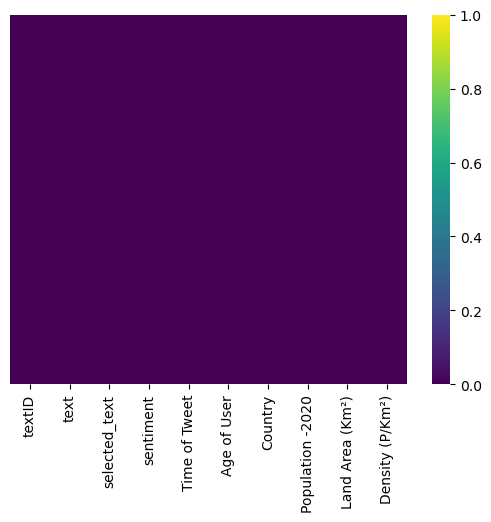

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")

In [8]:
df.isnull().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [9]:
len(df)

27481

In [10]:
df.shape

(27481, 10)

In [11]:
df['sentiment'].value_counts()

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

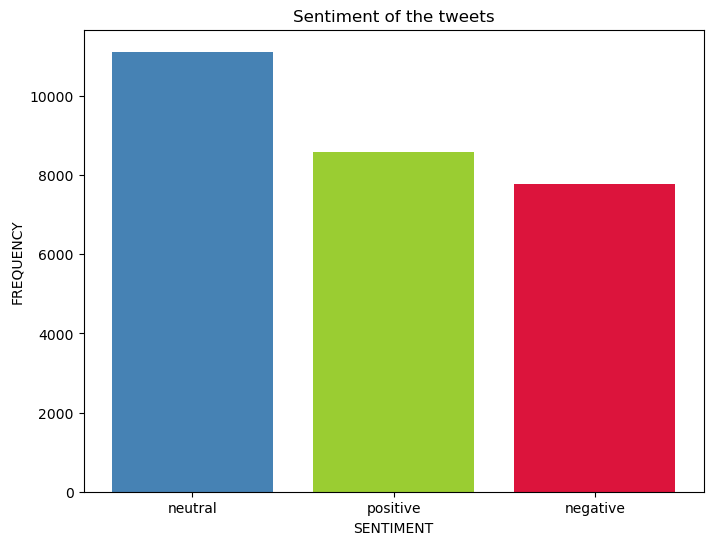

In [12]:
# Get the frequency of each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Bar plot of the sentiments in the tweet
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['SteelBlue', 'YellowGreen', 'Crimson'])
plt.xlabel("SENTIMENT")
plt.ylabel("FREQUENCY")
plt.title("Sentiment of the tweets")
plt.show()

In [13]:
df = df[['text', 'sentiment']]
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [14]:
df

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27475,wish we could come see u on Denver husband l...,negative
27476,I`ve wondered about rake to. The client has ...,negative
27477,Yay good for both of you. Enjoy the break - y...,positive
27478,But it was worth it ****.,positive


In [15]:
df.isnull().sum()

text         0
sentiment    0
dtype: int64

In [16]:
# Now we tokenize the text column in Tweet 
df['tokens'] = df['text'].apply(word_tokenize)
df

,text,sentiment,tokens
0,"I`d have responded, if I were going",neutral,"[I, `, d, have, responded, ,, if, I, were, going]"
1,Sooo SAD I will miss you here in San Diego!!!,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,..."
2,my boss is bullying me...,negative,"[my, boss, is, bullying, me, ...]"
3,what interview! leave me alone,negative,"[what, interview, !, leave, me, alone]"
4,"Sons of ****, why couldn`t they put them on t...",negative,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, t..."
...,...,...,...
27475,wish we could come see u on Denver husband l...,negative,"[wish, we, could, come, see, u, on, Denver, hu..."
27476,I`ve wondered about rake to. The client has ...,negative,"[I, `, ve, wondered, about, rake, to, ., The, ..."
27477,Yay good for both of you. Enjoy the break - y...,positive,"[Yay, good, for, both, of, you, ., Enjoy, the,..."
27478,But it was worth it ****.,positive,"[But, it, was, worth, it, *, *, *, *, .]"


In [17]:
# EDA 
# To check the word count of each tweet
df['Word_count'] = df['tokens'].apply(len)
df[['text','Word_count']]

,text,Word_count
0,"I`d have responded, if I were going",10
1,Sooo SAD I will miss you here in San Diego!!!,13
2,my boss is bullying me...,6
3,what interview! leave me alone,6
4,"Sons of ****, why couldn`t they put them on t...",20
...,...,...
27475,wish we could come see u on Denver husband l...,18
27476,I`ve wondered about rake to. The client has ...,31
27477,Yay good for both of you. Enjoy the break - y...,23
27478,But it was worth it ****.,10


In [18]:
# To check the character count of each tweet
df['Char_count'] = df['tokens'].apply(lambda tokens: len(''.join(tokens)))

df[['text','tokens','Char_count']]

,text,tokens,Char_count
0,"I`d have responded, if I were going","[I, `, d, have, responded, ,, if, I, were, going]",29
1,Sooo SAD I will miss you here in San Diego!!!,"[Sooo, SAD, I, will, miss, you, here, in, San,...",36
2,my boss is bullying me...,"[my, boss, is, bullying, me, ...]",21
3,what interview! leave me alone,"[what, interview, !, leave, me, alone]",26
4,"Sons of ****, why couldn`t they put them on t...","[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...",61
...,...,...,...
27475,wish we could come see u on Denver husband l...,"[wish, we, could, come, see, u, on, Denver, hu...",60
27476,I`ve wondered about rake to. The client has ...,"[I, `, ve, wondered, about, rake, to, ., The, ...",97
27477,Yay good for both of you. Enjoy the break - y...,"[Yay, good, for, both, of, you, ., Enjoy, the,...",88
27478,But it was worth it ****.,"[But, it, was, worth, it, *, *, *, *, .]",20


In [19]:
df

,text,sentiment,tokens,Word_count,Char_count
0,"I`d have responded, if I were going",neutral,"[I, `, d, have, responded, ,, if, I, were, going]",10,29
1,Sooo SAD I will miss you here in San Diego!!!,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...",13,36
2,my boss is bullying me...,negative,"[my, boss, is, bullying, me, ...]",6,21
3,what interview! leave me alone,negative,"[what, interview, !, leave, me, alone]",6,26
4,"Sons of ****, why couldn`t they put them on t...",negative,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...",20,61
...,...,...,...,...,...
27475,wish we could come see u on Denver husband l...,negative,"[wish, we, could, come, see, u, on, Denver, hu...",18,60
27476,I`ve wondered about rake to. The client has ...,negative,"[I, `, ve, wondered, about, rake, to, ., The, ...",31,97
27477,Yay good for both of you. Enjoy the break - y...,positive,"[Yay, good, for, both, of, you, ., Enjoy, the,...",23,88
27478,But it was worth it ****.,positive,"[But, it, was, worth, it, *, *, *, *, .]",10,20


In [20]:
# Calculate average word length for each tweet
df['avg_word_length'] = df.apply(lambda row: row['Char_count'] / row['Word_count'], axis=1)

# Print the DataFrame with the average word length
df[['tokens', 'avg_word_length']].head()

,tokens,avg_word_length
0,"[I, `, d, have, responded, ,, if, I, were, going]",2.900000
1,"[Sooo, SAD, I, will, miss, you, here, in, San,...",2.769231
2,"[my, boss, is, bullying, me, ...]",3.500000
3,"[what, interview, !, leave, me, alone]",4.333333
4,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...",3.050000


In [21]:
df

,text,sentiment,tokens,Word_count,Char_count,avg_word_length
0,"I`d have responded, if I were going",neutral,"[I, `, d, have, responded, ,, if, I, were, going]",10,29,2.900000
1,Sooo SAD I will miss you here in San Diego!!!,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...",13,36,2.769231
2,my boss is bullying me...,negative,"[my, boss, is, bullying, me, ...]",6,21,3.500000
3,what interview! leave me alone,negative,"[what, interview, !, leave, me, alone]",6,26,4.333333
4,"Sons of ****, why couldn`t they put them on t...",negative,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...",20,61,3.050000
...,...,...,...,...,...,...
27475,wish we could come see u on Denver husband l...,negative,"[wish, we, could, come, see, u, on, Denver, hu...",18,60,3.333333
27476,I`ve wondered about rake to. The client has ...,negative,"[I, `, ve, wondered, about, rake, to, ., The, ...",31,97,3.129032
27477,Yay good for both of you. Enjoy the break - y...,positive,"[Yay, good, for, both, of, you, ., Enjoy, the,...",23,88,3.826087
27478,But it was worth it ****.,positive,"[But, it, was, worth, it, *, *, *, *, .]",10,20,2.000000


In [22]:
# Next we need to find the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\donsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
#find out the count of stopwords
stop = stopwords.words('english')
df['Stopwords'] = df['tokens'].apply(lambda x: len([word for word in x if word.lower() in stop]))
df[['text','tokens','Stopwords']]

,text,tokens,Stopwords
0,"I`d have responded, if I were going","[I, `, d, have, responded, ,, if, I, were, going]",6
1,Sooo SAD I will miss you here in San Diego!!!,"[Sooo, SAD, I, will, miss, you, here, in, San,...",5
2,my boss is bullying me...,"[my, boss, is, bullying, me, ...]",3
3,what interview! leave me alone,"[what, interview, !, leave, me, alone]",2
4,"Sons of ****, why couldn`t they put them on t...","[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...",9
...,...,...,...
27475,wish we could come see u on Denver husband l...,"[wish, we, could, come, see, u, on, Denver, hu...",7
27476,I`ve wondered about rake to. The client has ...,"[I, `, ve, wondered, about, rake, to, ., The, ...",12
27477,Yay good for both of you. Enjoy the break - y...,"[Yay, good, for, both, of, you, ., Enjoy, the,...",9
27478,But it was worth it ****.,"[But, it, was, worth, it, *, *, *, *, .]",4


In [24]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
# To find hastags sentence
# Define a regular expression pattern to match hashtags
pattern = r'\#\w+'

# Function to count hashtags
def count_hashtags(tokens):
    hashtags = [token for token in tokens if re.match(pattern, token)]
    return len(hashtags)

# Apply the function to count hashtags in each row
df['hashtags'] = df['tokens'].apply(count_hashtags)
df.head(5)

,text,sentiment,tokens,Word_count,Char_count,avg_word_length,Stopwords,hashtags
0,"I`d have responded, if I were going",neutral,"[I, `, d, have, responded, ,, if, I, were, going]",10,29,2.900000,6,0
1,Sooo SAD I will miss you here in San Diego!!!,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...",13,36,2.769231,5,0
2,my boss is bullying me...,negative,"[my, boss, is, bullying, me, ...]",6,21,3.500000,3,0
3,what interview! leave me alone,negative,"[what, interview, !, leave, me, alone]",6,26,4.333333,2,0
4,"Sons of ****, why couldn`t they put them on t...",negative,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...",20,61,3.050000,9,0


In [26]:
# To find numerics sentence
def count_numerics(tokens):
    numerics = [token for token in tokens if token.isdigit()]
    return len(numerics)

# Apply the function to count numeric tokens in each row
df['numerics'] = df['tokens'].apply(count_numerics)
df

,text,sentiment,tokens,Word_count,Char_count,avg_word_length,Stopwords,hashtags,numerics
0,"I`d have responded, if I were going",neutral,"[I, `, d, have, responded, ,, if, I, were, going]",10,29,2.900000,6,0,0
1,Sooo SAD I will miss you here in San Diego!!!,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...",13,36,2.769231,5,0,0
2,my boss is bullying me...,negative,"[my, boss, is, bullying, me, ...]",6,21,3.500000,3,0,0
3,what interview! leave me alone,negative,"[what, interview, !, leave, me, alone]",6,26,4.333333,2,0,0
4,"Sons of ****, why couldn`t they put them on t...",negative,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...",20,61,3.050000,9,0,0
...,...,...,...,...,...,...,...,...,...
27475,wish we could come see u on Denver husband l...,negative,"[wish, we, could, come, see, u, on, Denver, hu...",18,60,3.333333,7,0,0
27476,I`ve wondered about rake to. The client has ...,negative,"[I, `, ve, wondered, about, rake, to, ., The, ...",31,97,3.129032,12,0,0
27477,Yay good for both of you. Enjoy the break - y...,positive,"[Yay, good, for, both, of, you, ., Enjoy, the,...",23,88,3.826087,9,0,0
27478,But it was worth it ****.,positive,"[But, it, was, worth, it, *, *, *, *, .]",10,20,2.000000,4,0,0


In [27]:
# To find Uppercase in sentence
df['upper'] = df['tokens'].apply(lambda tokens: sum(1 for token in tokens if token.isupper()))
df
#Upper Case Characters Presnt in Datset

,text,sentiment,tokens,Word_count,Char_count,avg_word_length,Stopwords,hashtags,numerics,upper
0,"I`d have responded, if I were going",neutral,"[I, `, d, have, responded, ,, if, I, were, going]",10,29,2.900000,6,0,0,2
1,Sooo SAD I will miss you here in San Diego!!!,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...",13,36,2.769231,5,0,0,2
2,my boss is bullying me...,negative,"[my, boss, is, bullying, me, ...]",6,21,3.500000,3,0,0,0
3,what interview! leave me alone,negative,"[what, interview, !, leave, me, alone]",6,26,4.333333,2,0,0,0
4,"Sons of ****, why couldn`t they put them on t...",negative,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...",20,61,3.050000,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...
27475,wish we could come see u on Denver husband l...,negative,"[wish, we, could, come, see, u, on, Denver, hu...",18,60,3.333333,7,0,0,0
27476,I`ve wondered about rake to. The client has ...,negative,"[I, `, ve, wondered, about, rake, to, ., The, ...",31,97,3.129032,12,0,0,2
27477,Yay good for both of you. Enjoy the break - y...,positive,"[Yay, good, for, both, of, you, ., Enjoy, the,...",23,88,3.826087,9,0,0,0
27478,But it was worth it ****.,positive,"[But, it, was, worth, it, *, *, *, *, .]",10,20,2.000000,4,0,0,0


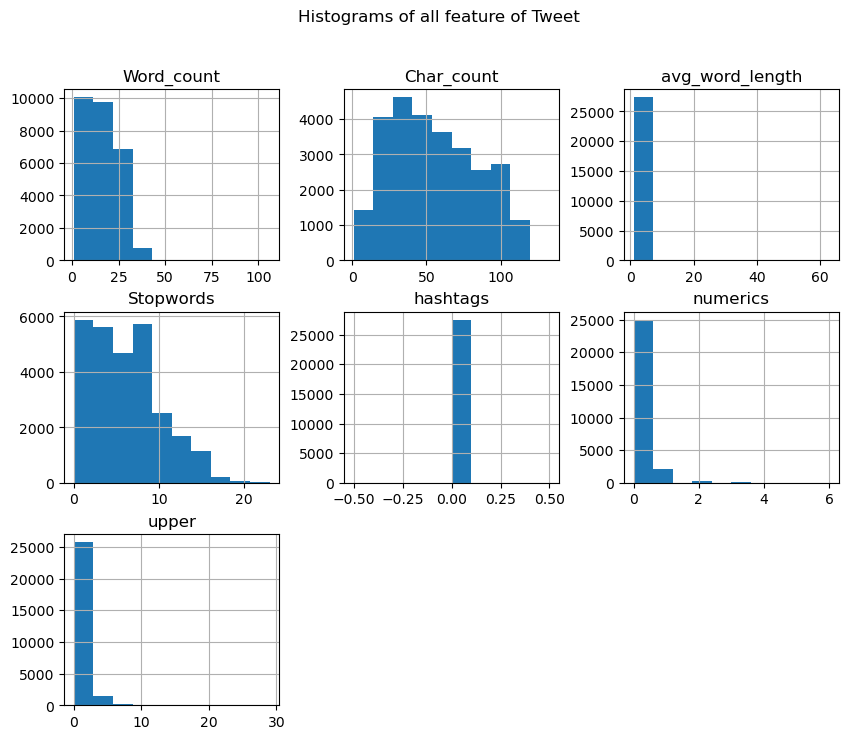

In [28]:
# Data visualization of the features of tweet
df.hist(figsize=(10, 8))
plt.suptitle("Histograms of all feature of Tweet")
plt.show()

In [29]:
# Converting text into lower case
df['clean_text'] = df['text'].str.lower()

In [30]:
# Removing Stopwords
stop_words = set(stopwords.words('english'))
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df

,text,sentiment,tokens,Word_count,Char_count,avg_word_length,Stopwords,hashtags,numerics,upper,clean_text
0,"I`d have responded, if I were going",neutral,"[I, `, d, have, responded, ,, if, I, were, going]",10,29,2.900000,6,0,0,2,"i`d responded, going"
1,Sooo SAD I will miss you here in San Diego!!!,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...",13,36,2.769231,5,0,0,2,sooo sad miss san diego!!!
2,my boss is bullying me...,negative,"[my, boss, is, bullying, me, ...]",6,21,3.500000,3,0,0,0,boss bullying me...
3,what interview! leave me alone,negative,"[what, interview, !, leave, me, alone]",6,26,4.333333,2,0,0,0,interview! leave alone
4,"Sons of ****, why couldn`t they put them on t...",negative,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...",20,61,3.050000,9,0,0,0,"sons ****, couldn`t put releases already bought"
...,...,...,...,...,...,...,...,...,...,...,...
27475,wish we could come see u on Denver husband l...,negative,"[wish, we, could, come, see, u, on, Denver, hu...",18,60,3.333333,7,0,0,0,wish could come see u denver husband lost job ...
27476,I`ve wondered about rake to. The client has ...,negative,"[I, `, ve, wondered, about, rake, to, ., The, ...",31,97,3.129032,12,0,0,2,i`ve wondered rake to. client made clear .net ...
27477,Yay good for both of you. Enjoy the break - y...,positive,"[Yay, good, for, both, of, you, ., Enjoy, the,...",23,88,3.826087,9,0,0,0,yay good you. enjoy break - probably need hect...
27478,But it was worth it ****.,positive,"[But, it, was, worth, it, *, *, *, *, .]",10,20,2.000000,4,0,0,0,worth ****.


In [31]:
# Removing Punctuations
df['clean_text'] = df['clean_text'].str.replace('[^\w\s]', '')

C:\Users\donsh\AppData\Local\Temp\ipykernel_17880\766353149.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df['clean_text'].str.replace('[^\w\s]', '')


In [32]:
# Removing Uppercase Tokens
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if not word.isupper()]))
df

,text,sentiment,tokens,Word_count,Char_count,avg_word_length,Stopwords,hashtags,numerics,upper,clean_text
0,"I`d have responded, if I were going",neutral,"[I, `, d, have, responded, ,, if, I, were, going]",10,29,2.900000,6,0,0,2,id responded going
1,Sooo SAD I will miss you here in San Diego!!!,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...",13,36,2.769231,5,0,0,2,sooo sad miss san diego
2,my boss is bullying me...,negative,"[my, boss, is, bullying, me, ...]",6,21,3.500000,3,0,0,0,boss bullying me
3,what interview! leave me alone,negative,"[what, interview, !, leave, me, alone]",6,26,4.333333,2,0,0,0,interview leave alone
4,"Sons of ****, why couldn`t they put them on t...",negative,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...",20,61,3.050000,9,0,0,0,sons couldnt put releases already bought
...,...,...,...,...,...,...,...,...,...,...,...
27475,wish we could come see u on Denver husband l...,negative,"[wish, we, could, come, see, u, on, Denver, hu...",18,60,3.333333,7,0,0,0,wish could come see u denver husband lost job ...
27476,I`ve wondered about rake to. The client has ...,negative,"[I, `, ve, wondered, about, rake, to, ., The, ...",31,97,3.129032,12,0,0,2,ive wondered rake to client made clear net onl...
27477,Yay good for both of you. Enjoy the break - y...,positive,"[Yay, good, for, both, of, you, ., Enjoy, the,...",23,88,3.826087,9,0,0,0,yay good you enjoy break probably need hectic ...
27478,But it was worth it ****.,positive,"[But, it, was, worth, it, *, *, *, *, .]",10,20,2.000000,4,0,0,0,worth


In [33]:
# Removing Hashtags
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'#\w+', '', x))

In [34]:
# Recalculate word count, character count, and average word length
df['clean_word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
df['clean_char_count'] = df['clean_text'].apply(len)
df['clean_avg_word_length'] = df['clean_char_count'] / df['clean_word_count']
df

,text,sentiment,tokens,Word_count,Char_count,avg_word_length,Stopwords,hashtags,numerics,upper,clean_text,clean_word_count,clean_char_count,clean_avg_word_length
0,"I`d have responded, if I were going",neutral,"[I, `, d, have, responded, ,, if, I, were, going]",10,29,2.900000,6,0,0,2,id responded going,3,18,6.000000
1,Sooo SAD I will miss you here in San Diego!!!,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...",13,36,2.769231,5,0,0,2,sooo sad miss san diego,5,23,4.600000
2,my boss is bullying me...,negative,"[my, boss, is, bullying, me, ...]",6,21,3.500000,3,0,0,0,boss bullying me,3,16,5.333333
3,what interview! leave me alone,negative,"[what, interview, !, leave, me, alone]",6,26,4.333333,2,0,0,0,interview leave alone,3,21,7.000000
4,"Sons of ****, why couldn`t they put them on t...",negative,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...",20,61,3.050000,9,0,0,0,sons couldnt put releases already bought,6,40,6.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27475,wish we could come see u on Denver husband l...,negative,"[wish, we, could, come, see, u, on, Denver, hu...",18,60,3.333333,7,0,0,0,wish could come see u denver husband lost job ...,11,57,5.181818
27476,I`ve wondered about rake to. The client has ...,negative,"[I, `, ve, wondered, about, rake, to, ., The, ...",31,97,3.129032,12,0,0,2,ive wondered rake to client made clear net onl...,17,90,5.294118
27477,Yay good for both of you. Enjoy the break - y...,positive,"[Yay, good, for, both, of, you, ., Enjoy, the,...",23,88,3.826087,9,0,0,0,yay good you enjoy break probably need hectic ...,13,72,5.538462
27478,But it was worth it ****.,positive,"[But, it, was, worth, it, *, *, *, *, .]",10,20,2.000000,4,0,0,0,worth,1,5,5.000000


In [35]:
#saving dataset to csv format
df.to_csv('tweetbi.csv')

In [36]:
# Display the cleaned data
cleaned_df = df[['clean_text', 'sentiment', 'clean_word_count', 'clean_char_count', 'clean_avg_word_length']]
cleaned_df

,clean_text,sentiment,clean_word_count,clean_char_count,clean_avg_word_length
0,id responded going,neutral,3,18,6.000000
1,sooo sad miss san diego,negative,5,23,4.600000
2,boss bullying me,negative,3,16,5.333333
3,interview leave alone,negative,3,21,7.000000
4,sons couldnt put releases already bought,negative,6,40,6.666667
...,...,...,...,...,...
27475,wish could come see u denver husband lost job ...,negative,11,57,5.181818
27476,ive wondered rake to client made clear net onl...,negative,17,90,5.294118
27477,yay good you enjoy break probably need hectic ...,positive,13,72,5.538462
27478,worth,positive,1,5,5.000000


In [37]:
# Commonly used words
#Commonly Used Words And Thier Count
freq = pd.Series(' '.join(cleaned_df['clean_text']).split()).value_counts()[:10]
freq

im      3024
day     2044
good    1549
get     1426
like    1346
go      1266
dont    1200
its     1195
love    1122
work    1112
dtype: int64

In [38]:
#Removing the Common Words
freq = list(freq.index)
cleaned_df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
cleaned_df['clean_text'].head()

C:\Users\donsh\AppData\Local\Temp\ipykernel_17880\2413922140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


0                          id responded going
1                     sooo sad miss san diego
2                            boss bullying me
3                       interview leave alone
4    sons couldnt put releases already bought
Name: clean_text, dtype: object

In [39]:
# Rare Words From Dataset
freq1 = pd.Series(' '.join(['clean_text']).split()).value_counts()[-10:]
freq1

clean_text    1
dtype: int64

In [40]:
#Removing Rare Words From Dataset
freq1 = list(freq1.index)
cleaned_df['clean_text'] = cleaned_df['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
cleaned_df['clean_text'].head()

C:\Users\donsh\AppData\Local\Temp\ipykernel_17880\3596276341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['clean_text'] = cleaned_df['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))


0                          id responded going
1                     sooo sad miss san diego
2                            boss bullying me
3                       interview leave alone
4    sons couldnt put releases already bought
Name: clean_text, dtype: object

In [41]:
# Remove URLs from the 'text' column
cleaned_df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r"http\S+|www\S+|https\S+", "", x, flags=re.MULTILINE))

# Display the modified DataFrame
cleaned_df['clean_text']

C:\Users\donsh\AppData\Local\Temp\ipykernel_17880\2079329718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r"http\S+|www\S+|https\S+", "", x, flags=re.MULTILINE))


0                                       id responded going
1                                  sooo sad miss san diego
2                                         boss bullying me
3                                    interview leave alone
4                 sons couldnt put releases already bought
                               ...                        
27475    wish could come see u denver husband lost job ...
27476    ive wondered rake to client made clear net onl...
27477    yay good you enjoy break probably need hectic ...
27478                                                worth
27479                   flirting going atg smiles yay hugs
Name: clean_text, Length: 27480, dtype: object

In [42]:
# Advanced text processing

In [43]:
# TextBlob
# Apply word correction to the first 5 rows of the 'text' column
cleaned_df['clean_text'][:5] = df['clean_text'][:5].apply(lambda x: str(TextBlob(x).correct()))

# Display the modified DataFrame
print(cleaned_df['clean_text'][:5])

0                        id responded going
1                   soon sad miss san diego
2                          boss building me
3                     interview leave alone
4    sons couldn put release already bought
Name: clean_text, dtype: object


C:\Users\donsh\AppData\Local\Temp\ipykernel_17880\3911167269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['clean_text'][:5] = df['clean_text'][:5].apply(lambda x: str(TextBlob(x).correct()))


In [44]:
TextBlob(cleaned_df['clean_text'][1]).words

WordList(['soon', 'sad', 'miss', 'san', 'diego'])

In [45]:
# Stemming
st = PorterStemmer()
cleaned_df['clean_text'][:5].apply(lambda x:" ".join([st.stem(word) for word in x.split()]))
cleaned_df

,clean_text,sentiment,clean_word_count,clean_char_count,clean_avg_word_length
0,id responded going,neutral,3,18,6.000000
1,soon sad miss san diego,negative,5,23,4.600000
2,boss building me,negative,3,16,5.333333
3,interview leave alone,negative,3,21,7.000000
4,sons couldn put release already bought,negative,6,40,6.666667
...,...,...,...,...,...
27475,wish could come see u denver husband lost job ...,negative,11,57,5.181818
27476,ive wondered rake to client made clear net onl...,negative,17,90,5.294118
27477,yay good you enjoy break probably need hectic ...,positive,13,72,5.538462
27478,worth,positive,1,5,5.000000


In [46]:
#N-grams are the combination of multiple words used together.
TextBlob(cleaned_df['clean_text'][0]).ngrams(2)

[WordList(['id', 'responded']), WordList(['responded', 'going'])]

In [47]:
# TF
#Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

tf1 = (cleaned_df['clean_text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,soon,1
1,sad,1
2,miss,1
3,san,1
4,diego,1


In [48]:
# # IDF
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(cleaned_df.shape[0]/(len(cleaned_df[cleaned_df['clean_text'].str.contains(word)])))
tf1
#The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing
#in all the documents.

,words,tf,idf
0,soon,1,4.481421
1,sad,1,3.837707
2,miss,1,3.325531
3,san,1,5.152310
4,diego,1,7.736307


In [49]:
# TF-IDF is the multiplication of the TF and IDF which we calculated below
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,soon,1,4.481421,4.481421
1,sad,1,3.837707,3.837707
2,miss,1,3.325531,3.325531
3,san,1,5.152310,5.152310
4,diego,1,7.736307,7.736307


In [50]:
cleaned_df

,clean_text,sentiment,clean_word_count,clean_char_count,clean_avg_word_length
0,id responded going,neutral,3,18,6.000000
1,soon sad miss san diego,negative,5,23,4.600000
2,boss building me,negative,3,16,5.333333
3,interview leave alone,negative,3,21,7.000000
4,sons couldn put release already bought,negative,6,40,6.666667
...,...,...,...,...,...
27475,wish could come see u denver husband lost job ...,negative,11,57,5.181818
27476,ive wondered rake to client made clear net onl...,negative,17,90,5.294118
27477,yay good you enjoy break probably need hectic ...,positive,13,72,5.538462
27478,worth,positive,1,5,5.000000


In [51]:
#saving dataset to csv format
cleaned_df.to_csv('cleanedtwitter.csv')

In [52]:
# Joining the modified text
all_words = ' '.join([text for text in cleaned_df['clean_text']])
all_words

'id responded going soon sad miss san diego boss building me interview leave alone sons couldn put release already bought  shameless plugging best rangers forum earth 2am feedings baby fun smiles coos soooo high  journey wow u became cooler hehe is possible much love hopeful reckon chances minimal p im never gonna get cake stuff really really like song love story taylor swift sharpie running dangerously low ink want go music tonight lost voice test test lg env2 uh oh sunburned sok trying plot alternatives speak sigh ive sick past days thus hair looks wierd didnt hat would look  back home gonna miss every one hes oh marly im sorry hope find soon 3 3 playing ghost online really interesting new updates kirin pet metamorph third job cant wait dragon pet cleaning house family comming later today gotta restart computer thought win7 supposed put end constant rebootiness see wat mean bout foll0w friidays its called lose f0llowers friday smh free fillin app ipod fun im addicted im sorry way mal

In [53]:
# To define the polarity 
# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(clean_text):
    # Create a TextBlob object
    blob = TextBlob(clean_text)
    # Get the polarity score
    polarity = blob.sentiment.polarity
    # Assign sentiment labels based on polarity score
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [54]:
cleaned_df

,clean_text,sentiment,clean_word_count,clean_char_count,clean_avg_word_length
0,id responded going,neutral,3,18,6.000000
1,soon sad miss san diego,negative,5,23,4.600000
2,boss building me,negative,3,16,5.333333
3,interview leave alone,negative,3,21,7.000000
4,sons couldn put release already bought,negative,6,40,6.666667
...,...,...,...,...,...
27475,wish could come see u denver husband lost job ...,negative,11,57,5.181818
27476,ive wondered rake to client made clear net onl...,negative,17,90,5.294118
27477,yay good you enjoy break probably need hectic ...,positive,13,72,5.538462
27478,worth,positive,1,5,5.000000


In [55]:
# Apply sentiment analysis to the 'clean_text' column
cleaned_df['sentiment_textblob'] = df['clean_text'].apply(analyze_sentiment)
cleaned_df

C:\Users\donsh\AppData\Local\Temp\ipykernel_17880\279173101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['sentiment_textblob'] = df['clean_text'].apply(analyze_sentiment)


,clean_text,sentiment,clean_word_count,clean_char_count,clean_avg_word_length,sentiment_textblob
0,id responded going,neutral,3,18,6.000000,neutral
1,soon sad miss san diego,negative,5,23,4.600000,negative
2,boss building me,negative,3,16,5.333333,neutral
3,interview leave alone,negative,3,21,7.000000,neutral
4,sons couldn put release already bought,negative,6,40,6.666667,neutral
...,...,...,...,...,...,...
27475,wish could come see u denver husband lost job ...,negative,11,57,5.181818,neutral
27476,ive wondered rake to client made clear net onl...,negative,17,90,5.294118,positive
27477,yay good you enjoy break probably need hectic ...,positive,13,72,5.538462,positive
27478,worth,positive,1,5,5.000000,positive


In [56]:
# Assuming df is your DataFrame and 'sentiment' is the column you want to encode
label_encoder = LabelEncoder()

# Apply label encoding to the 'sentiment' column
cleaned_df['sentiment_encoded'] = label_encoder.fit_transform(cleaned_df['sentiment'])

# Display the modified DataFrame
print(cleaned_df[['sentiment', 'sentiment_encoded']])

      sentiment  sentiment_encoded
0       neutral                  1
1      negative                  0
2      negative                  0
3      negative                  0
4      negative                  0
...         ...                ...
27475  negative                  0
27476  negative                  0
27477  positive                  2
27478  positive                  2
27479   neutral                  1

[27480 rows x 2 columns]


C:\Users\donsh\AppData\Local\Temp\ipykernel_17880\1477934217.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['sentiment_encoded'] = label_encoder.fit_transform(cleaned_df['sentiment'])


In [57]:
# Function to get polarity and subjectivity using TextBlob
def get_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def get_subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity

# Apply the functions to the 'clean_text' column
cleaned_df['polarity'] = cleaned_df['clean_text'].apply(get_polarity)
cleaned_df['subjectivity'] = cleaned_df['clean_text'].apply(get_subjectivity)

C:\Users\donsh\AppData\Local\Temp\ipykernel_17880\1636059266.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['polarity'] = cleaned_df['clean_text'].apply(get_polarity)
C:\Users\donsh\AppData\Local\Temp\ipykernel_17880\1636059266.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['subjectivity'] = cleaned_df['clean_text'].apply(get_subjectivity)


In [58]:
cleaned_df

,clean_text,sentiment,clean_word_count,clean_char_count,clean_avg_word_length,sentiment_textblob,sentiment_encoded,polarity,subjectivity
0,id responded going,neutral,3,18,6.000000,neutral,1,0.000000,0.000000
1,soon sad miss san diego,negative,5,23,4.600000,negative,0,-0.500000,1.000000
2,boss building me,negative,3,16,5.333333,neutral,0,0.000000,0.000000
3,interview leave alone,negative,3,21,7.000000,neutral,0,0.000000,0.000000
4,sons couldn put release already bought,negative,6,40,6.666667,neutral,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
27475,wish could come see u denver husband lost job ...,negative,11,57,5.181818,neutral,0,0.000000,0.000000
27476,ive wondered rake to client made clear net onl...,negative,17,90,5.294118,positive,0,0.147273,0.517576
27477,yay good you enjoy break probably need hectic ...,positive,13,72,5.538462,positive,2,0.550000,0.550000
27478,worth,positive,1,5,5.000000,positive,2,0.300000,0.100000


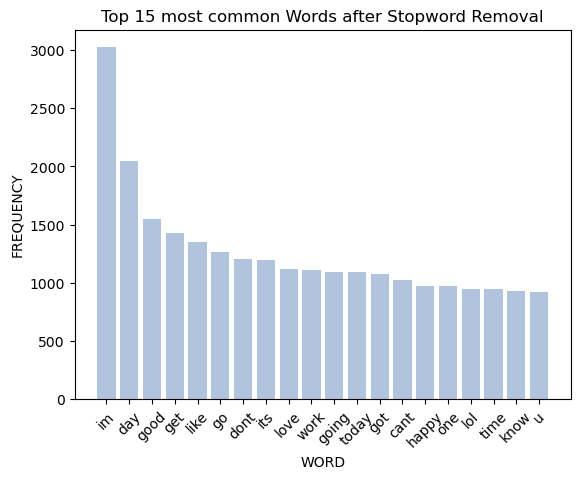

In [59]:
# Split the text into individual words
all_words = all_words.split()

# Count the occurrence of each word
word_counts = Counter(all_words)

# Get the top 15 most common words
top_words = word_counts.most_common(20)

# Create a bar plot for the top words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words], color="LightSteelBlue")

# Add labels and title
plt.xlabel('WORD')
plt.ylabel('FREQUENCY')
plt.title('Top 15 most common Words after Stopword Removal')

# Rotate x-tick label for better readability
plt.xticks(rotation=45)

# Display plot
plt.show()

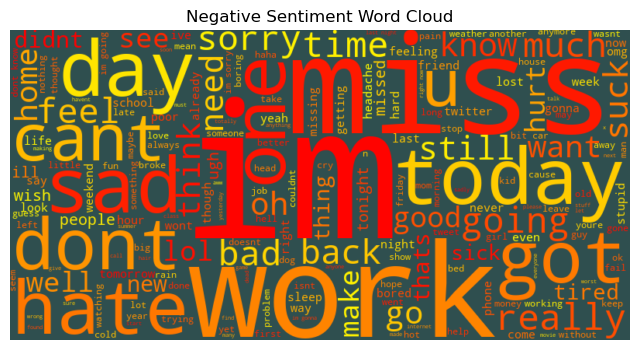

In [60]:
# Assuming df_copy is your DataFrame with 'sentiment_encoded' and 'text' columns
# Filter the DataFrame based on sentiment categories
negative_df = cleaned_df[cleaned_df['sentiment'] == 'negative']

# Concatenate clean_text for negative sentiment
negative_text = ' '.join(negative_df['clean_text'])

# Generate WordCloud for negative sentiment category
wordcloud_negative = WordCloud(width=800, height=400, background_color="DarkSlateGray",colormap = 'autumn').generate(negative_text)

# Plot WordCloud for negative sentiment category
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("Negative Sentiment Word Cloud")
plt.axis('off')
plt.show()

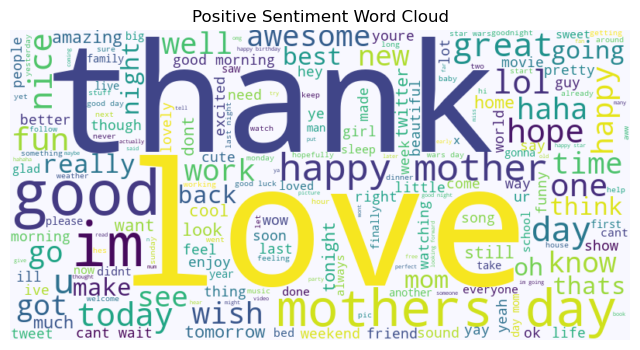

In [61]:
# Assuming df_copy is your DataFrame with 'sentiment_encoded' and 'text' columns
# Filter the dataframe for positive sentiment
positive_df = cleaned_df[cleaned_df['sentiment'] == 'positive']

# Concatenate clean_text for positive sentiment
positive_text = ' '.join(positive_df['clean_text'])
# Generate WordCloud for positive sentiment category
wordcloud_positive = WordCloud(width=800, height=400, background_color="GhostWhite", colormap="viridis").generate(positive_text)

# Plot WordCloud for positive sentiment category
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title("Positive Sentiment Word Cloud")
plt.axis('off')
plt.show()

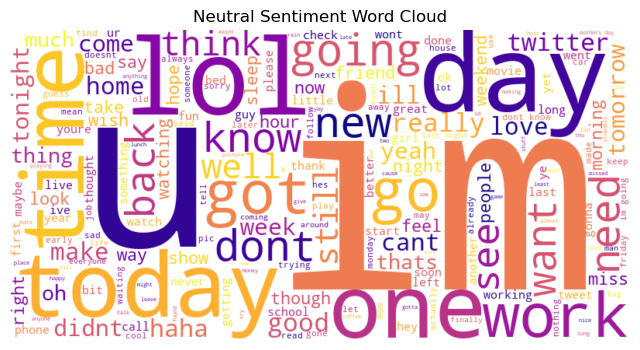

In [62]:
# Assuming df_copy is your DataFrame with 'sentiment_encoded' and 'text' columns
# Filter the dataframe for neutral sentiment
neutral_df = cleaned_df[cleaned_df['sentiment'] == 'neutral']

# Concatenate clean_text for neutral sentiment
neutral_text = ' '.join(neutral_df['clean_text'])

# Generate WordCloud for neutral sentiment category
wordcloud_neutral = WordCloud(width=800, height=400, background_color="white", colormap="plasma").generate(neutral_text)

# Plot WordCloud for neutral sentiment category
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title("Neutral Sentiment Word Cloud")
plt.axis('off')
plt.show()

In [63]:
T_copy = cleaned_df
T_copy.head()

,clean_text,sentiment,clean_word_count,clean_char_count,clean_avg_word_length,sentiment_textblob,sentiment_encoded,polarity,subjectivity
0,id responded going,neutral,3,18,6.000000,neutral,1,0.0,0.0
1,soon sad miss san diego,negative,5,23,4.600000,negative,0,-0.5,1.0
2,boss building me,negative,3,16,5.333333,neutral,0,0.0,0.0
3,interview leave alone,negative,3,21,7.000000,neutral,0,0.0,0.0
4,sons couldn put release already bought,negative,6,40,6.666667,neutral,0,0.0,0.0


In [64]:
cleaned_df.to_csv('Cleaned_Tweet.csv')

In [65]:
# Text Classification using Machine Learning
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(T_copy['clean_text'], T_copy['sentiment'],
                                                   test_size=0.2, random_state=42)

In [66]:
X_train

21208         oh hes hilarious im commenting fact hes much
18264    thanks trying hoping bud trillin fest would ho...
9683                 show house rocked saying goodbye soon
9688     430am west coast timegettin ready catch flight...
22727    computer slooowww morning think its sign go ho...
                               ...                        
21575                               feels like warm things
5390                             best friend vegas without
860                              fire urban rock challenge
15795                                     a effort though 
23654                claire love show got office 5am radio
Name: clean_text, Length: 21984, dtype: object

In [67]:
X_test

1588                        enjoy family trumps everything
10413           of kinda turns all buy dig deeper hole etc
6561                               clive its birthday pat 
2602                                          congrats hey
4003                                               texting
                               ...                        
12295    investigated whether could change username erm...
616                        one know likes boiled peanuts t
4504     awww whered get that hugh thin traces wolverin...
14491          im craving cinnamon toast crunch cold today
24838    im buffalo worshipper maybe time pay visit pre...
Name: clean_text, Length: 5496, dtype: object

In [68]:
y_train

21208    positive
18264    positive
9683      neutral
9688     positive
22727     neutral
           ...   
21575     neutral
5390      neutral
860       neutral
15795    positive
23654    positive
Name: sentiment, Length: 21984, dtype: object

In [69]:
y_test

1588     positive
10413    negative
6561      neutral
2602     positive
4003      neutral
           ...   
12295     neutral
616       neutral
4504      neutral
14491    negative
24838     neutral
Name: sentiment, Length: 5496, dtype: object

In [70]:
# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features = 5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [71]:
# Save the fitted TF-IDF vectorizer using pickle
vectorizer_file_path = "tfidf_vectorizer.pkl"
with open(vectorizer_file_path, "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

In [72]:
X_train_tfidf

<21984x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 136436 stored elements in Compressed Sparse Row format>

In [73]:
X_test_tfidf

<5496x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 33495 stored elements in Compressed Sparse Row format>

In [74]:
T_copy.isnull().any()

clean_text               False
sentiment                False
clean_word_count         False
clean_char_count         False
clean_avg_word_length     True
sentiment_textblob       False
sentiment_encoded        False
polarity                 False
subjectivity             False
dtype: bool

In [75]:
T_copy.dropna(inplace=True)
T_copy

C:\Users\donsh\AppData\Local\Temp\ipykernel_17880\3504739541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_copy.dropna(inplace=True)


,clean_text,sentiment,clean_word_count,clean_char_count,clean_avg_word_length,sentiment_textblob,sentiment_encoded,polarity,subjectivity
0,id responded going,neutral,3,18,6.000000,neutral,1,0.000000,0.000000
1,soon sad miss san diego,negative,5,23,4.600000,negative,0,-0.500000,1.000000
2,boss building me,negative,3,16,5.333333,neutral,0,0.000000,0.000000
3,interview leave alone,negative,3,21,7.000000,neutral,0,0.000000,0.000000
4,sons couldn put release already bought,negative,6,40,6.666667,neutral,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
27475,wish could come see u denver husband lost job ...,negative,11,57,5.181818,neutral,0,0.000000,0.000000
27476,ive wondered rake to client made clear net onl...,negative,17,90,5.294118,positive,0,0.147273,0.517576
27477,yay good you enjoy break probably need hectic ...,positive,13,72,5.538462,positive,2,0.550000,0.550000
27478,worth,positive,1,5,5.000000,positive,2,0.300000,0.100000


In [76]:
T_copy.isnull().any()

clean_text               False
sentiment                False
clean_word_count         False
clean_char_count         False
clean_avg_word_length    False
sentiment_textblob       False
sentiment_encoded        False
polarity                 False
subjectivity             False
dtype: bool

# Supervised Learning

In [77]:
# Train and evaluate different classifiers
def train_and_evaluate_classifier(classifier, name):
    # Train the classifier
    classifier.fit(X_train_tfidf, y_train)
    
    # Make predictions in the test set
    y_pred = classifier.predict(X_test_tfidf)
    
    # Evaluate the model
    print(f"\n{name} Classifier:")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Visualize the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=T_copy['sentiment'].unique())
    plt.figure(figsize=(8, 6))
    # Set colormap based on the classifier
    cmap = None
    if name == "Logistic Regression":
        cmap = 'viridis'
    elif name == "Support Vector Machine":
        cmap = 'magma'
    elif name == "Decision Tree":
        cmap = 'summer'
    elif name == "Random Forest":
        cmap = 'winter'
    elif name == "Naive Bayes":
        cmap = 'copper'
    # Change the colormap here
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=T_copy['sentiment'].unique(), 
                yticklabels=T_copy['sentiment'].unique(), cmap=cmap)
    plt.title(f"{name} Classifier - Confusion Matrix")
    plt.show()

## Logistic Regression


Logistic Regression Classifier:
Classification Report:
              precision    recall  f1-score   support

    negative       0.71      0.57      0.63      1572
     neutral       0.63      0.75      0.68      2236
    positive       0.77      0.70      0.74      1688

    accuracy                           0.69      5496
   macro avg       0.70      0.68      0.68      5496
weighted avg       0.69      0.69      0.69      5496



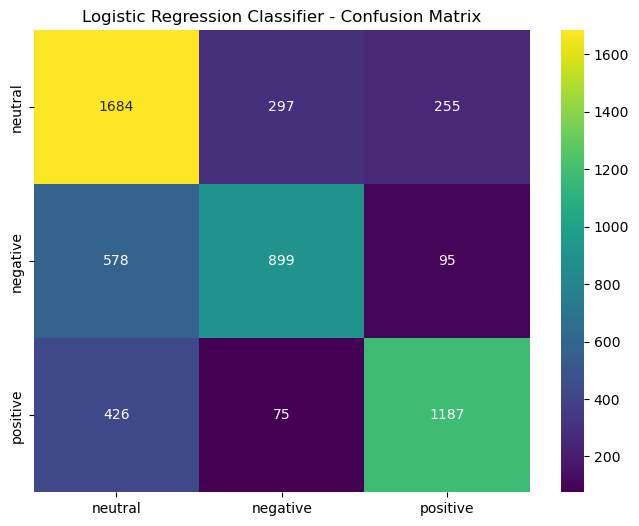

In [78]:
# Train and evaluate Logistic Regression classifier
logistic_reg_class = LogisticRegression(max_iter=1000)
train_and_evaluate_classifier(logistic_reg_class, "Logistic Regression")

## Support Vector Machine


Support Vector Machine Classifier:
Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.57      0.64      1572
     neutral       0.64      0.78      0.70      2236
    positive       0.79      0.72      0.75      1688

    accuracy                           0.70      5496
   macro avg       0.72      0.69      0.70      5496
weighted avg       0.71      0.70      0.70      5496



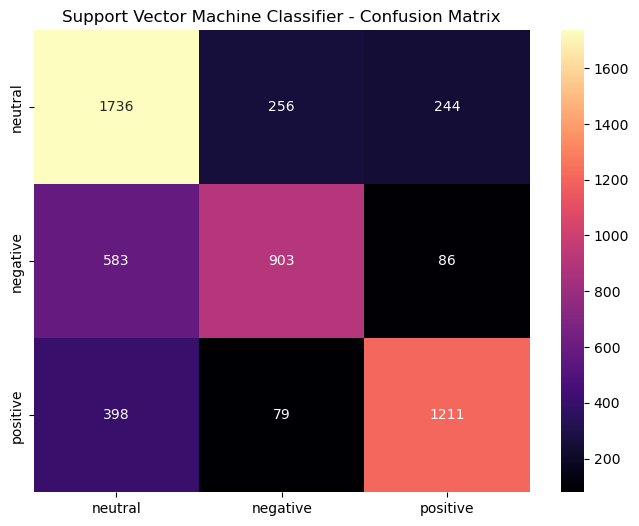

In [79]:
# Train and evaluate SVM classifier
svm_classifier = SVC(kernel='linear')
train_and_evaluate_classifier(svm_classifier, "Support Vector Machine")

## Decision Tree Classification


Decision Tree Classifier:
Classification Report:
              precision    recall  f1-score   support

    negative       0.63      0.59      0.61      1572
     neutral       0.63      0.64      0.63      2236
    positive       0.68      0.72      0.70      1688

    accuracy                           0.65      5496
   macro avg       0.65      0.65      0.65      5496
weighted avg       0.65      0.65      0.65      5496



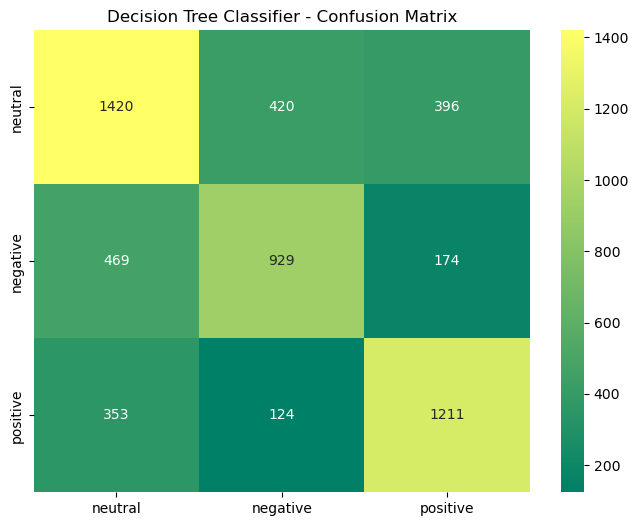

In [80]:
# Train and evaluate 
Decision_tree_classifier = DecisionTreeClassifier(random_state=42)
train_and_evaluate_classifier(Decision_tree_classifier, "Decision Tree")

## Random Forest Classification


Random Forest Classifier:
Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.59      0.65      1572
     neutral       0.66      0.72      0.69      2236
    positive       0.73      0.77      0.75      1688

    accuracy                           0.70      5496
   macro avg       0.71      0.69      0.70      5496
weighted avg       0.70      0.70      0.70      5496



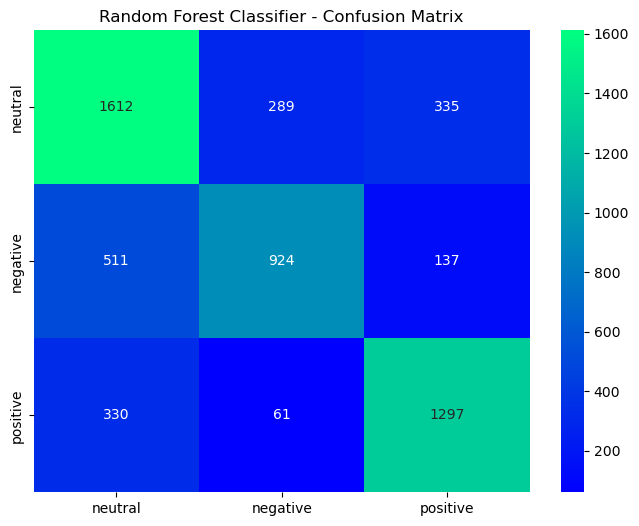

In [81]:
# Train and evaluate Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate_classifier(random_forest_classifier, "Random Forest")

## Naive Bayes classifier


MultinomialNB Classifier:
Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.47      0.57      1572
     neutral       0.57      0.78      0.66      2236
    positive       0.74      0.61      0.67      1688

    accuracy                           0.64      5496
   macro avg       0.68      0.62      0.63      5496
weighted avg       0.66      0.64      0.64      5496



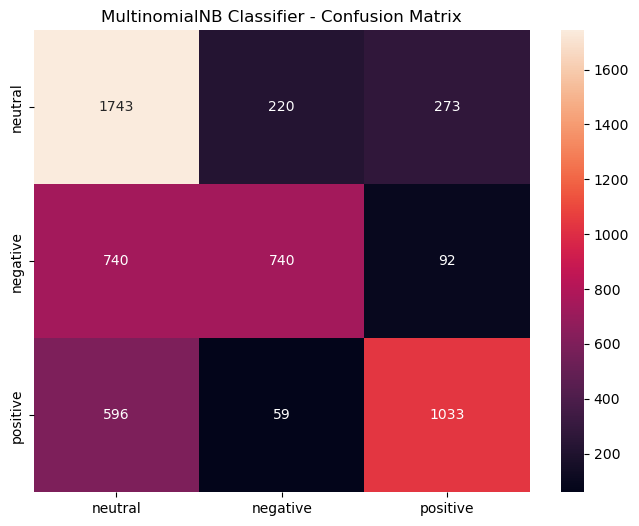

In [82]:
multinomial_nb_classifier = MultinomialNB()

# Train and evaluate Multinomial Naive Bayes classifier
train_and_evaluate_classifier(multinomial_nb_classifier, "MultinomialNB")

#### Draw a tree diagram for one of the decision trees in the Random Forest

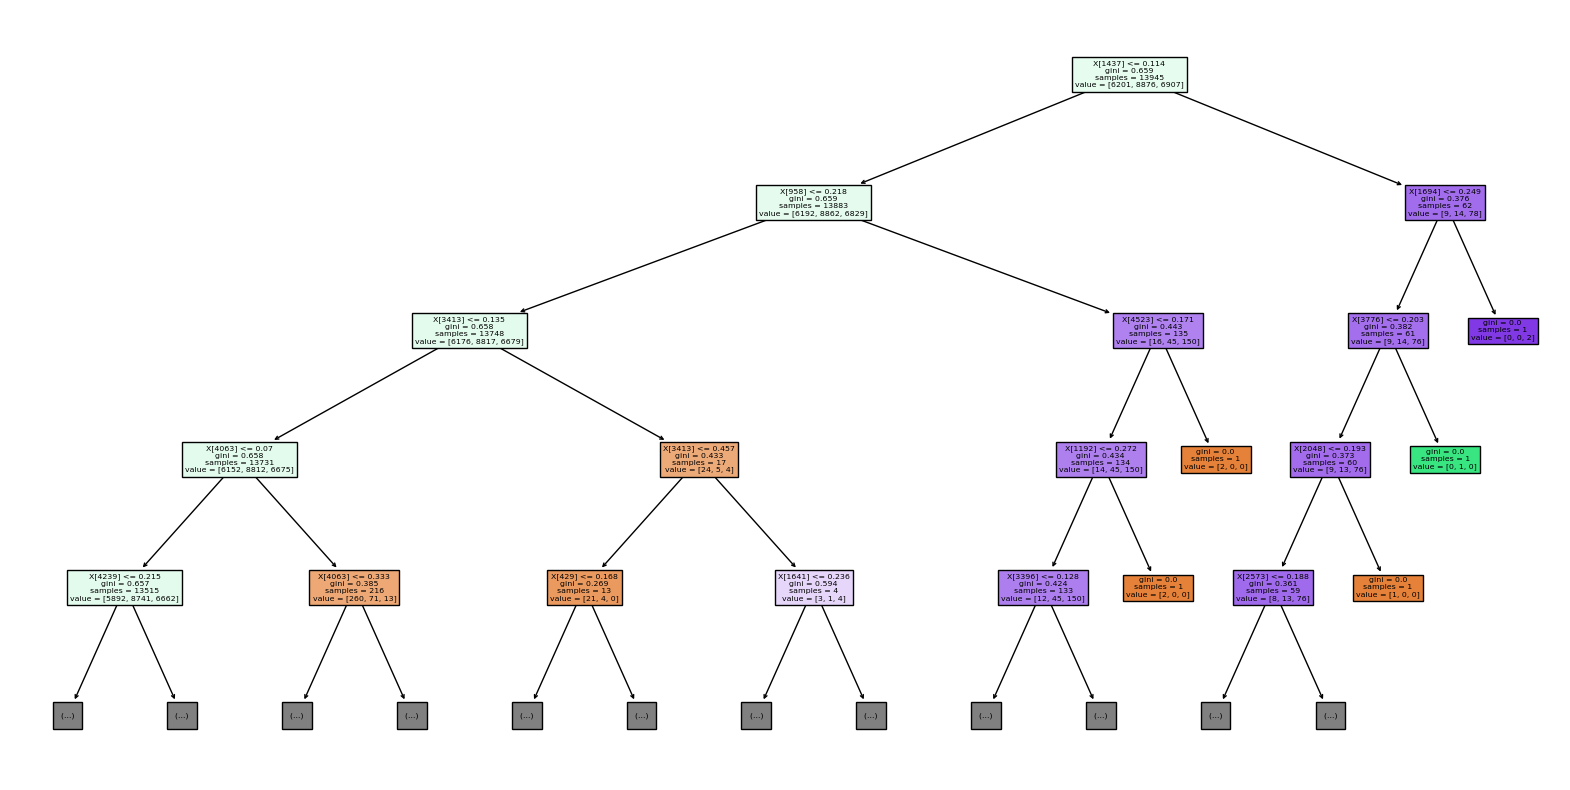

In [83]:
# Selecting the first tree (index 0) from the ensemble
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
tree.plot_tree(random_forest_classifier.estimators_[0], filled=True, max_depth=4)  # Limit depth to 6 for example
plt.show()

# Unsupervised Learning

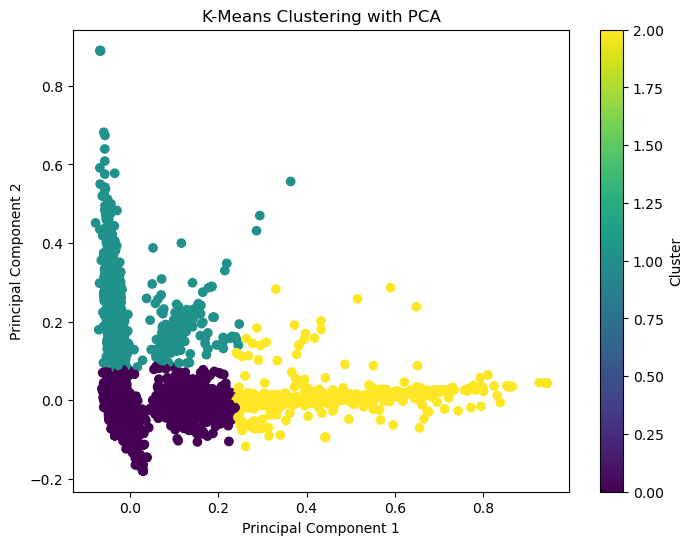

In [84]:
# Principle Component Analysis
# Convert spares matrix to dense matrix
X_train_dense = X_train_tfidf.toarray()

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_dense)

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = kmeans.labels_, cmap='viridis')
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Prediction on new data

In [85]:
# Make predictions on new data
new_data = ["is good.","my boss is not good","what interview! leave me alone"]
new_data_tfidf = tfidf_vectorizer.transform(new_data)

print("\nPrediction on New Data:")
for text, prediction in zip(new_data, logistic_reg_class.predict(new_data_tfidf)):
    print(f"Text : {text}, Predicted Sentiment (Logistic Regression): {prediction}")
    
for text, prediction in zip(new_data, svm_classifier.predict(new_data_tfidf)):
    print(f"Text: {text}, Predicted Sentiment (SVM): {prediction}")
    
for text, prediction in zip(new_data, Decision_tree_classifier.predict(new_data_tfidf)):
    print(f"Text: {text}, Predicted Sentiment (Decision Tree): {prediction}")
    
for text, prediction in zip(new_data, random_forest_classifier.predict(new_data_tfidf)):
    print(f"Text: {text}, Predicted Sentiment (Random Forest): {prediction}")
    
for text, prediction in zip(new_data, multinomial_nb_classifier.predict(new_data_tfidf)):
    print(f"Text: {text}, Predicted Sentiment (Naive Bayes): {prediction}")



Prediction on New Data:
Text : is good., Predicted Sentiment (Logistic Regression): positive
Text : my boss is not good, Predicted Sentiment (Logistic Regression): neutral
Text : what interview! leave me alone, Predicted Sentiment (Logistic Regression): neutral
Text: is good., Predicted Sentiment (SVM): positive
Text: my boss is not good, Predicted Sentiment (SVM): negative
Text: what interview! leave me alone, Predicted Sentiment (SVM): neutral
Text: is good., Predicted Sentiment (Decision Tree): positive
Text: my boss is not good, Predicted Sentiment (Decision Tree): negative
Text: what interview! leave me alone, Predicted Sentiment (Decision Tree): neutral
Text: is good., Predicted Sentiment (Random Forest): positive
Text: my boss is not good, Predicted Sentiment (Random Forest): positive
Text: what interview! leave me alone, Predicted Sentiment (Random Forest): neutral
Text: is good., Predicted Sentiment (Naive Bayes): positive
Text: my boss is not good, Predicted Sentiment (Naive

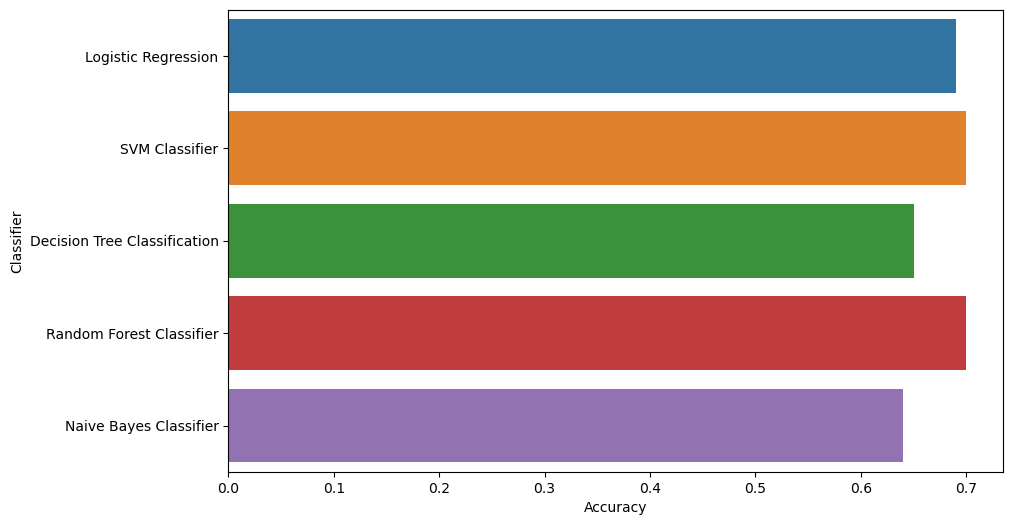

In [86]:
# # Accuracy comparison diagram
# Define classifier names and accuracies
classifier_names = ["Logistic Regression", "SVM Classifier", "Decision Tree Classification", "Random Forest Classifier", "Naive Bayes Classifier"]
accuracies = [0.69, 0.70, 0.65, 0.70, 0.64]

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=accuracies, y=classifier_names)
ax.set_xlabel('Accuracy')
ax.set_ylabel('Classifier')
plt.show()

# Hyperparameter Tunning 

In [87]:
# Load the dataset
# Assuming the dataset is loaded into a DataFrame named df
# The DataFrame should have two columns: 'text' and 'sentiment'
# 'text' contains the text data and 'sentiment' contains the sentiment labels

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(cleaned_df['clean_text'], cleaned_df['sentiment'],
                                                   test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Define models & their parameter grid for hyperparameter tunning
models = {
    'LogisticRegression':{
        'model': LogisticRegression(),
        'params':{'C':[0.1,1,10,100], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
    },
    'SVM':{
        'model':SVC(),
        'params':{'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001], 'kernel':['rbf', 'linear']}
    },
    'DecisionTree': {
    'model': DecisionTreeClassifier(),
    'params': {'criterion': ['gini', 'entropy'],
               'max_depth': [3, 5, 7, 10, 15], 'min_samples_leaf': [3, 5, 10, 15, 20],
               'min_samples_split': [8, 10, 12, 18, 20, 16]}
    },

    'RandomForest':{
        'model': RandomForestClassifier(),
        'params':{'n_estimators':[50,100,200,300], 'max_depth':[None, 10, 20, 30]}
    }
}

# Iterate through the models, perform hyperparameter tuning using RandomizedSearchCV, train, and evaluate them
for model_name, config in models.items():
    model = config['model']
    params = config['params']
    
    # Hyperparameter tunning using RandomizedSearchCV
    random_search = RandomizedSearchCV(model, params, n_iter=10, cv=5, n_jobs=-1, scoring='accuracy', random_state=101)
    random_search.fit(X_train_tfidf, y_train)
    
    # Get the best model
    best_model = random_search.best_estimator_
    
    # Predict on the validation set
    y_val_pred = best_model.predict(X_test_tfidf)
    
    # Calculate accuracy and f1 score on the validation set
    accuracy = accuracy_score(y_test, y_val_pred)
    f1 = f1_score(y_test, y_val_pred, average='weighted')
    
    # Print the results
    print(f"Model: {model_name}")
    print(f"Best Hyperparameters: {random_search.best_params_}")
    print(f"Accuracy on Test Set: {accuracy:.2f}")
    print(f"F1 Score on Test Set: {f1:.2f}")
    
    # Add classification report for more details
    print("\nClassification Report on Test Set:")
    report = classification_report(y_test, y_val_pred)
    print(report) 

    print("-" * 50)

Model: LogisticRegression
Best Hyperparameters: {'solver': 'newton-cg', 'C': 1}
Accuracy on Test Set: 0.68
F1 Score on Test Set: 0.68

Classification Report on Test Set:
              precision    recall  f1-score   support

    negative       0.73      0.59      0.65      1565
     neutral       0.61      0.74      0.67      2162
    positive       0.76      0.69      0.73      1765

    accuracy                           0.68      5492
   macro avg       0.70      0.68      0.68      5492
weighted avg       0.69      0.68      0.68      5492

--------------------------------------------------
Model: SVM
Best Hyperparameters: {'kernel': 'rbf', 'gamma': 1, 'C': 100}
Accuracy on Test Set: 0.69
F1 Score on Test Set: 0.69

Classification Report on Test Set:
              precision    recall  f1-score   support

    negative       0.72      0.61      0.66      1565
     neutral       0.62      0.74      0.67      2162
    positive       0.77      0.69      0.73      1765

    accuracy     

In [88]:
# Make predictions on new data
new_data = ["is good.","my boss is not good","what interview! leave me alone"]
new_data_tfidf = vectorizer.transform(new_data)

print("\nPrediction on New Data:")
for text, prediction in zip(new_data, logistic_reg_class.predict(new_data_tfidf)):
    print(f"Text: {text}, Predicted Sentiment (Logistic Regression): {prediction}")
    
for text, prediction in zip(new_data, svm_classifier.predict(new_data_tfidf)):
    print(f"Text: {text}, Predicted Sentiment (SVM): {prediction}")
    
for text, prediction in zip(new_data, Decision_tree_classifier.predict(new_data_tfidf)):
    print(f"Text: {text}, Predicted Sentiment (Decision Tree): {prediction}")
    
for text, prediction in zip(new_data, random_forest_classifier.predict(new_data_tfidf)):
    print(f"Text: {text}, Predicted Sentiment (Random Forest): {prediction}")



Prediction on New Data:


ValueError: X has 24433 features, but LogisticRegression is expecting 5000 features as input.